以下のSystem Dyamics言語のコード群をJuliaコードに変換して時間積分を実行できるようにまとめて示してください。
AdoptionFractioni = 0.015
AdvertisingEffectivenessa = 0.011
AverageProductLifel = 5
ContactRatec = 100
TotalPopulationN = 1e+06
AdoptionfromAdvertising = AdvertisingEffectivenessa * PotentialAdoptersP
AdoptionfromWordofMouth = ContactRatec*AdoptionFractioni * PotentialAdoptersP * AdoptersA / TotalPopulationN
AdoptionRateAR = AdoptionfromAdvertising + AdoptionfromWordofMouth
DiscardRate = AdoptersA/AverageProductLifel
AdoptersA= INTEG (AdoptionRateAR - DiscardRate,0)
PotentialAdoptersP = INTEG ( -AdoptionRateAR + DiscardRate, TotalPopulationN - AdoptersA)

パッケージの追加

In [1]:
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

    Updating registry at `C:\Users\Makoto Kimura\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\Makoto Kimura\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Makoto Kimura\.julia\environments\v1.9\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\Makoto Kimura\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Makoto Kimura\.julia\environments\v1.9\Manifest.toml`

Norton-Bassモデルの設定

In [1]:
using DifferentialEquations
using Plots

# Parameters
AdoptionFractioni = 0.015
AdvertisingEffectivenessa = 0.011
AverageProductLifel = 5
ContactRatec = 100
TotalPopulationN = 1e+06

# System of ODEs
function system!(du, u, p, t)
    AdoptersA, PotentialAdoptersP = u

    AdoptionfromAdvertising = AdvertisingEffectivenessa * PotentialAdoptersP
    AdoptionfromWordofMouth = ContactRatec * AdoptionFractioni * PotentialAdoptersP * AdoptersA / TotalPopulationN
    AdoptionRateAR = AdoptionfromAdvertising + AdoptionfromWordofMouth
    DiscardRate = AdoptersA / AverageProductLifel

    du[1] = AdoptionRateAR - DiscardRate
    du[2] = -AdoptionRateAR + DiscardRate
end

# Initial conditions
u0 = [0, TotalPopulationN - 0]

# Time span
tspan = (0.0, 10.0)

# Problem
prob = ODEProblem(system!, u0, tspan)

# Solver
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 111-element Vector{Float64}:
  0.0
  9.090900000004546e-5
  0.0008303706947292832
  0.004570209657233546
  0.012325255577507445
  0.023399785442353285
  0.037592072718358766
  0.05548596375442229
  0.07701657938549383
  0.10234535024735214
  ⋮
  8.706714418408673
  8.866562406937218
  9.032343508918586
  9.204519029313166
  9.383601301069428
  9.57015855966871
  9.764824592691086
  9.968310363577977
 10.0
u: 111-element Vector{Vector{Float64}}:
 [0.0, 1.0e6]
 [1.0000575930356057, 999998.999942407]
 [9.138967671950976, 999990.8610323281]
 [50.42066870730805, 999949.5793312928]
 [136.66040199382832, 999863.3395980062]
 [261.31802104445876, 999738.6819789556]
 [423.6918525824403, 999576.3081474176]
 [632.6906758426304, 999367.3093241574]
 [890.630372577029, 999109.369627423]
 [1203.36037819209, 998796.639621808]
 ⋮
 [866820.7372211656, 133179.26277883432]
 [867003.1027271707, 132996.89727282926]
 [867155.8804521

実行結果の出力

In [2]:
# Plot results
p=plot(sol, xlabel="Time", ylabel="Population", title="Adopters and Potential Adopters", lw=2)
# グラフをファイルに保存
savefig(p, "NB.png")  # PNG 形式で保存

"c:\\Users\\kmako\\Dropbox\\JuliaDocs\\NortonBassModel\\NB.png"

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


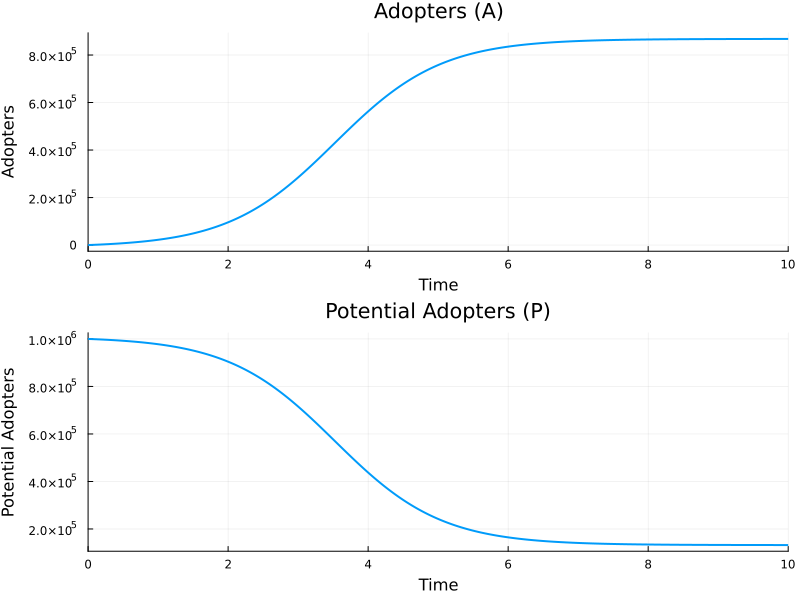

In [3]:
# Create a plot with AdoptersA
plot1 = plot(sol, vars=(1), xlabel="Time", ylabel="Adopters", title="Adopters (A)", lw=2, legend=:none)

# Create a plot with PotentialAdoptersP
plot2 = plot(sol, vars=(2), xlabel="Time", ylabel="Potential Adopters", title="Potential Adopters (P)", lw=2, legend=:none)

# Combine the plots
p = plot(plot1, plot2, layout=(2, 1), size=(800, 600))


各変数の時系列変化値を表形式で表示する

In [4]:
using DataFrames

# Create a DataFrame
sol_df = DataFrame(Time = sol.t, AdoptersA = sol[1, :], PotentialAdoptersP = sol[2, :])

# Show the first 10 rows of the DataFrame
first(sol_df, 10)

Row,Time,AdoptersA,PotentialAdoptersP
,Float64,Float64,Float64
1,0.0,0.0,1.0e6
2,9.0909e-5,1.00006,999999.0
3,0.000830371,9.13897,9.99991e5
4,0.00457021,50.4207,9.9995e5
5,0.0123253,136.66,9.99863e5
6,0.0233998,261.318,9.99739e5
7,0.0375921,423.692,9.99576e5
8,0.055486,632.691,9.99367e5
9,0.0770166,890.63,9.99109e5
